In [26]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import random
from keras.preprocessing.image import load_img
import keras


In [27]:
input_path = []
labels = []

base_dir = "/Users/naomigong/Coding/ML Projects/facialEmotions/train/train"

for class_name in os.listdir(base_dir):
    path_name = os.path.join(base_dir, class_name)
    if os.path.isdir(path_name):
        #this gets each image and path is the image file
        for image in os.listdir(path_name):
            if 'angry' in path_name:
                labels.append(0)
            elif 'disgust' in path_name:
                labels.append(1)
            elif 'fear' in path_name:
                labels.append(2)
            elif 'happy' in path_name:
                labels.append(3)
            elif 'neutral' in path_name:
                labels.append(4)
            elif 'sad' in path_name:
                labels.append(5)
            elif 'surprise' in path_name:
                labels.append(6)
            
            input_path.append(os.path.join(path_name, image))


In [28]:
input_path

['/Users/naomigong/Coding/ML Projects/facialEmotions/train/train/happy/Training_50449107.jpg',
 '/Users/naomigong/Coding/ML Projects/facialEmotions/train/train/happy/Training_70433018.jpg',
 '/Users/naomigong/Coding/ML Projects/facialEmotions/train/train/happy/Training_85610005.jpg',
 '/Users/naomigong/Coding/ML Projects/facialEmotions/train/train/happy/Training_4460748.jpg',
 '/Users/naomigong/Coding/ML Projects/facialEmotions/train/train/happy/Training_6312930.jpg',
 '/Users/naomigong/Coding/ML Projects/facialEmotions/train/train/happy/Training_25740534.jpg',
 '/Users/naomigong/Coding/ML Projects/facialEmotions/train/train/happy/Training_80076077.jpg',
 '/Users/naomigong/Coding/ML Projects/facialEmotions/train/train/happy/Training_431681.jpg',
 '/Users/naomigong/Coding/ML Projects/facialEmotions/train/train/happy/Training_76432922.jpg',
 '/Users/naomigong/Coding/ML Projects/facialEmotions/train/train/happy/Training_53152280.jpg',
 '/Users/naomigong/Coding/ML Projects/facialEmotions/t

In [29]:
emotions = pd.DataFrame()
emotions['images'] = input_path
emotions['emotion'] = labels
emotions.head()
emotions = emotions.sample(frac =1).reset_index(drop = True)

In [30]:
#check for corrupted images
for image in emotions['images']:
    if 'jpg' not in image:
        print(image)

import PIL
corrupted = []
for image in emotions['images']:
    try:
        img = PIL.image.open(image)
    except:
        corrupted.append(image)
print(corrupted)
#no corrupted images

['/Users/naomigong/Coding/ML Projects/facialEmotions/train/train/angry/Training_4025110.jpg', '/Users/naomigong/Coding/ML Projects/facialEmotions/train/train/neutral/Training_5530820.jpg', '/Users/naomigong/Coding/ML Projects/facialEmotions/train/train/happy/Training_73384238.jpg', '/Users/naomigong/Coding/ML Projects/facialEmotions/train/train/neutral/Training_84441308.jpg', '/Users/naomigong/Coding/ML Projects/facialEmotions/train/train/sad/Training_57389547.jpg', '/Users/naomigong/Coding/ML Projects/facialEmotions/train/train/angry/Training_94199297.jpg', '/Users/naomigong/Coding/ML Projects/facialEmotions/train/train/happy/Training_34747187.jpg', '/Users/naomigong/Coding/ML Projects/facialEmotions/train/train/sad/Training_48379949.jpg', '/Users/naomigong/Coding/ML Projects/facialEmotions/train/train/angry/Training_31785074.jpg', '/Users/naomigong/Coding/ML Projects/facialEmotions/train/train/sad/Training_84985112.jpg', '/Users/naomigong/Coding/ML Projects/facialEmotions/train/train

In [31]:
emotions.shape


(28709, 2)

In [32]:
emotions.head()

,images,emotion
0,/Users/naomigong/Coding/ML Projects/facialEmot...,0
1,/Users/naomigong/Coding/ML Projects/facialEmot...,4
2,/Users/naomigong/Coding/ML Projects/facialEmot...,3
3,/Users/naomigong/Coding/ML Projects/facialEmot...,4
4,/Users/naomigong/Coding/ML Projects/facialEmot...,5


In [33]:
anger = emotions[emotions['emotion'] == 0]['images']
anger.head()


0     /Users/naomigong/Coding/ML Projects/facialEmot...
5     /Users/naomigong/Coding/ML Projects/facialEmot...
8     /Users/naomigong/Coding/ML Projects/facialEmot...
12    /Users/naomigong/Coding/ML Projects/facialEmot...
18    /Users/naomigong/Coding/ML Projects/facialEmot...
Name: images, dtype: object

In [34]:
def get_emotion(num):
    return emotions[emotions['emotion'] == num]['images']

In [35]:
anger = get_emotion(1)
anger.shape
type(anger)
len(anger)
anger.head()

27     /Users/naomigong/Coding/ML Projects/facialEmot...
137    /Users/naomigong/Coding/ML Projects/facialEmot...
156    /Users/naomigong/Coding/ML Projects/facialEmot...
174    /Users/naomigong/Coding/ML Projects/facialEmot...
183    /Users/naomigong/Coding/ML Projects/facialEmot...
Name: images, dtype: object

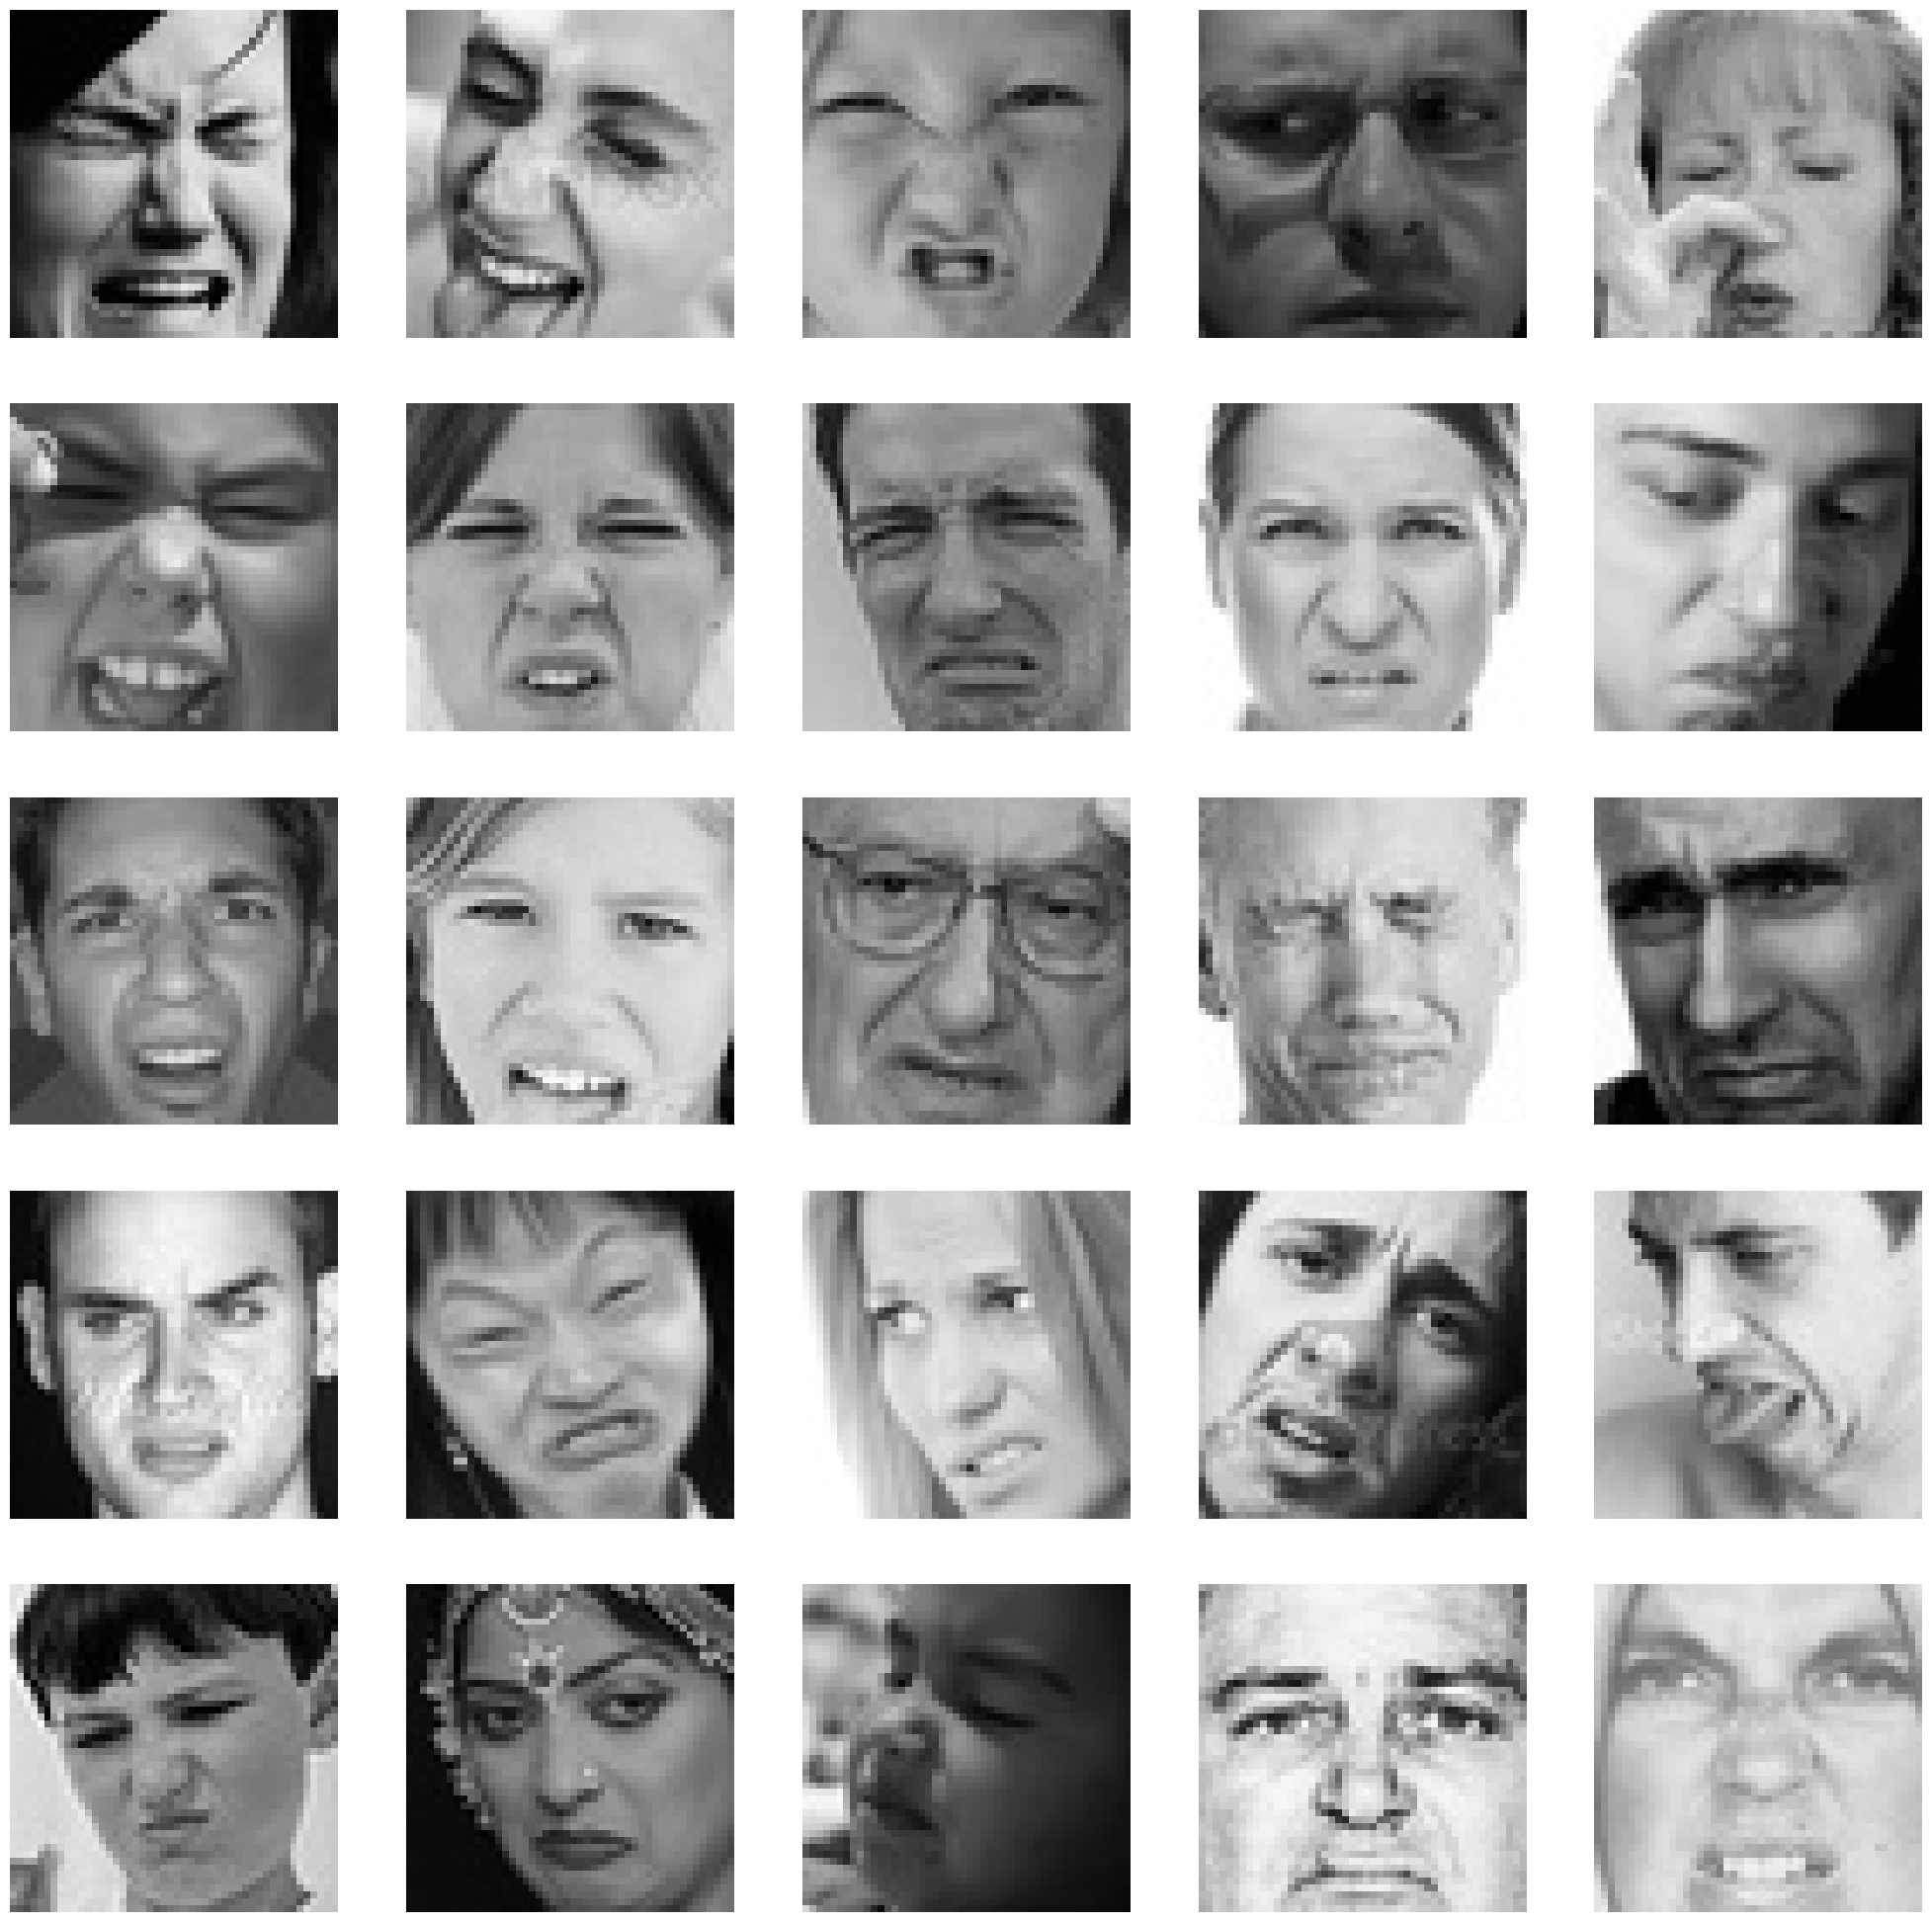

In [36]:
plt.figure(figsize=(25,25))
emotion = get_emotion(0)
start = random.randint(0, len(emotion))
files = anger[start: start+25]

for index, file in enumerate(files):
    plt.subplot(5,5, index + 1)
    img = load_img(file)
    #turn image into array
    img = np.array(img)
    plt.imshow(img)
    plt.axis('off')

In [37]:
def load_images(num):
    plt.figure(figsize=(25,25))
    emotion = get_emotion(num)
    start = random.randint(0, len(emotion))
    files = anger[start: start+25]

    for index, file in enumerate(files):
        plt.subplot(5,5, index + 1)
        img = load_img(file)
        #turn image into array
        img = np.array(img)
        plt.imshow(img)
        plt.axis('off')


<Figure size 2500x2500 with 0 Axes>

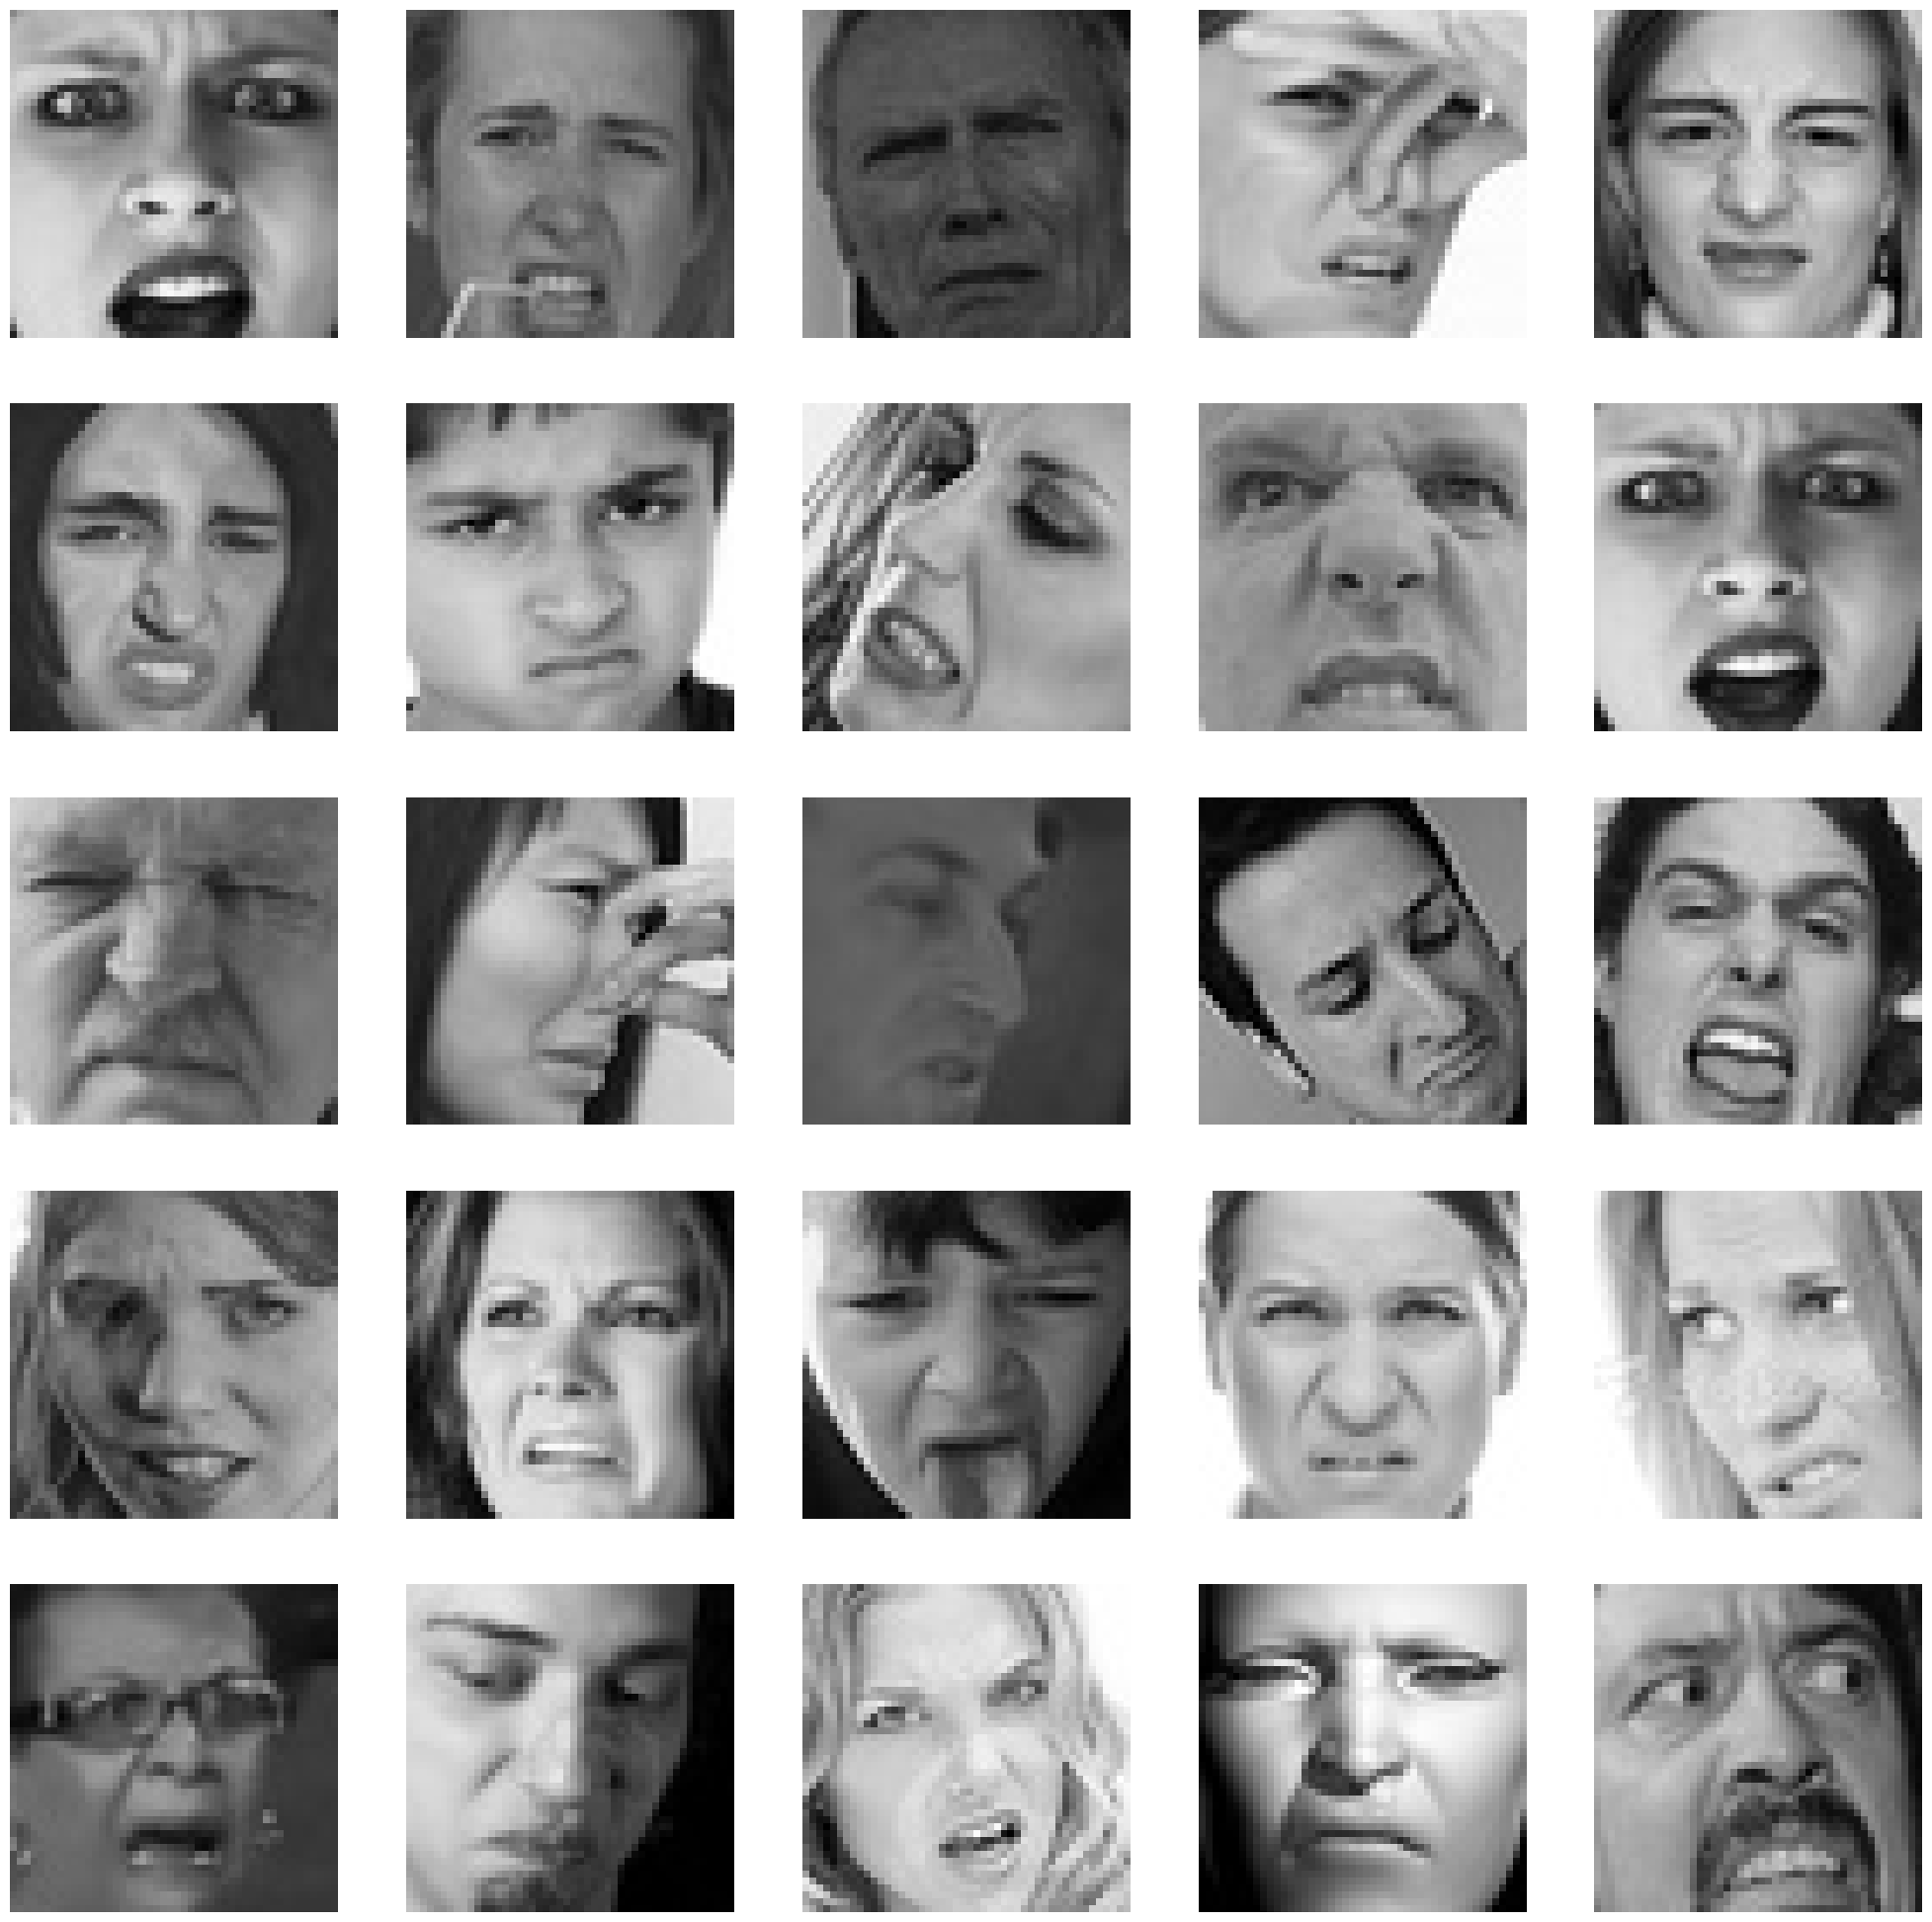

<Figure size 2500x2500 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

In [38]:
for emotion in range(len(emotions['emotion'].unique())):
    load_images(emotion)

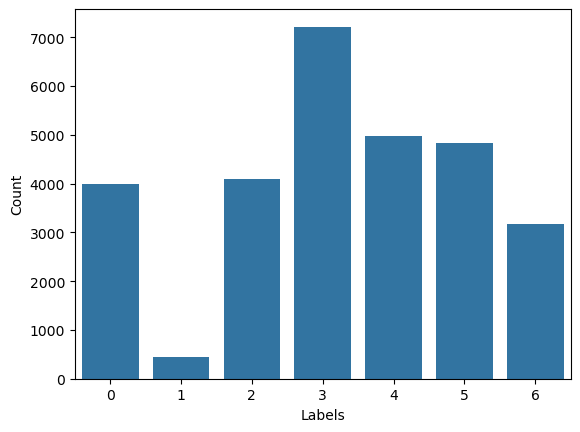

In [39]:
import seaborn as sns
sns.countplot(x = 'emotion', data = emotions)
plt.xlabel('Labels')
plt.ylabel('Count')
plt.show()

In [40]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(emotions['images']   , emotions['emotion'] , test_size= 0.2, random_state = 2)
print(xtrain.shape, ytrain.shape)

(22967,) (22967,)


In [41]:
from keras import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense
import tensorflow as tf

model = tf.keras.models.Sequential()
model.add(Conv2D(8, kernel_size = (5, 5), activation = 'relu', input_shape = (128, 128, 3)))
model.add(MaxPool2D(2,2))
model.add(Conv2D(8, kernel_size = (5, 5), activation = 'relu'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(8, kernel_size = (5, 5), activation = 'relu'))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(7, activation = 'softmax'))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 124, 124, 8)    │           608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 62, 62, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 58, 58, 8)      │         1,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 29, 29, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 25, 25, 8)      │         1,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 12, 12, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 300,791 (1.15 MB)

 Trainable params: 300,791 (1.15 MB)

 Non-trainable params: 0 (0.00 B)

In [43]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [44]:
# Parameters
  # Adjust to match the input shape of your model

# Preprocess images
xtest_image_numeric = []
for file in xtest:
    img = load_img(file, target_size =  (48, 48))  # Resize image to fit into model
    img_array = np.array(img)  # Convert image to array
    xtest_image_numeric.append(img_array)

# Convert list to NumPy array and normalize pixel values
xtest_image_numeric = np.array(xtest_image_numeric) / 255.0

# Ensure ytrain is a NumPy array and is of the correct type
ytest = np.array(ytest)

In [47]:

# Parameters
  # Adjust to match the input shape of your model

# Preprocess images
xtrain_image_numeric = []
for file in xtrain:
    img = load_img(file, target_size =  (48, 48))  # Resize image to fit into model
    img_array = np.array(img)  # Convert image to array
    xtrain_image_numeric.append(img_array)

# Convert list to NumPy array and normalize pixel values
xtrain_image_numeric = np.array(xtrain_image_numeric) / 255.0

# Ensure ytrain is a NumPy array and is of the correct type
ytrain = np.array(ytrain)

# Fit the model
history = model.fit(xtrain_image_numeric, y=ytrain, batch_size=128, epochs=30, validation_data=(xtest_image_numeric, ytest))


Epoch 1/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 51s 282ms/step - accuracy: 0.4646 - loss: 1.4085 - val_accuracy: 0.4643 - val_loss: 1.4012
Epoch 2/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 43s 236ms/step - accuracy: 0.4974 - loss: 1.3099 - val_accuracy: 0.4826 - val_loss: 1.3647
Epoch 3/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 42s 232ms/step - accuracy: 0.5440 - loss: 1.2013 - val_accuracy: 0.4760 - val_loss: 1.3994
Epoch 4/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 40s 222ms/step - accuracy: 0.6006 - loss: 1.0807 - val_accuracy: 0.4934 - val_loss: 1.3789
Epoch 5/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 41s 225ms/step - accuracy: 0.6695 - loss: 0.9107 - val_accuracy: 0.4810 - val_loss: 1.4499
Epoch 6/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 40s 222ms/step - accuracy: 0.7303 - loss: 0.7604 - val_accuracy: 0.5066 - val_loss: 1.5706
Epoch 7/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 40s 222ms/step - accuracy: 0.8018 - loss: 0.5664 - val_accuracy: 0.5033 - val_loss: 1.7605
Epoch 8/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 43s 236ms/step - accuracy: 0.8633 - loss: 0

KeyboardInterrupt: 

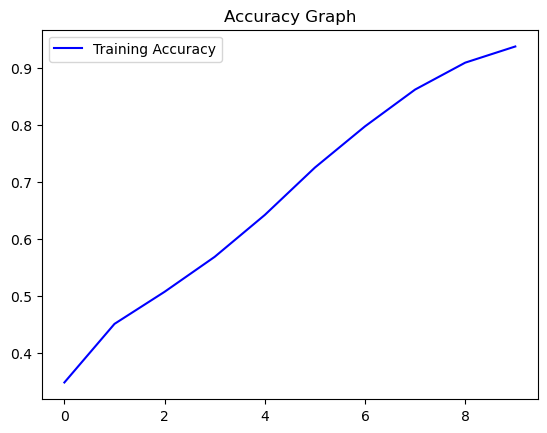

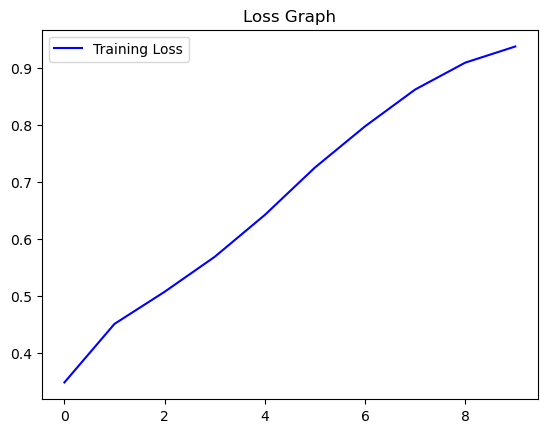

In [ ]:
#for training
acc = history.history['accuracy']
epochs = range(len(acc))
plt.plot(epochs, acc, 'b', label = 'Training Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
plt.plot(epochs, acc, 'b', label = 'Training Loss')
plt.title('Loss Graph')
plt.legend()

In [ ]:

# Parameters
  # Adjust to match the input shape of your model

# Preprocess images
xtest_image_numeric = []
for file in xtest:
    img = load_img(file, target_size =  (128, 128))  # Resize image to fit into model
    img_array = np.array(img)  # Convert image to array
    xtest_image_numeric.append(img_array)

# Convert list to NumPy array and normalize pixel values
xtest_image_numeric = np.array(xtest_image_numeric) / 255.0

# Ensure ytrain is a NumPy array and is of the correct type
ytrain = np.array(ytrain)

# Fit the model
history = model.evaluate(xtest_image_numeric, ytest)

180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.4686 - loss: 3.2801
